## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('LoanStatus.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    object 
 2   Married           611 non-null    object 
 3   Dependents        599 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     582 non-null    object 
 6   ApplicantIncome   614 non-null    int64  
 7   LoanAmount        592 non-null    float64
 8   Loan_Amount_Term  600 non-null    float64
 9   Credit_History    564 non-null    float64
 10  Property_Area     614 non-null    object 
 11  Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.shape

(614, 12)

In [7]:
df.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [8]:
df["ApplicantIncome"].mean()

5403.459283387622

In [9]:
df["ApplicantIncome"].median()

3812.5

In [10]:
df["ApplicantIncome"].std()

6109.041673387178

In [11]:
df["Loan_Amount_Term"].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [12]:
flt = ( df["Loan_Amount_Term"] == 360)
df[flt]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [13]:
df.isnull().any()

Loan_ID             False
Gender               True
Married              True
Dependents           True
Education           False
Self_Employed        True
ApplicantIncome     False
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area       False
Loan_Status         False
dtype: bool

In [14]:
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [15]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,349.0,360.0,1.0,Semiurban,N


In [16]:
loan_Y = df[df["Loan_Status"] =="Y"]["Loan_Status"].count() # 422

In [17]:
total_loan = df["Loan_Status"].count()

In [18]:
print(f"Probability of loan is {loan_Y/total_loan}") #  სესხის აღების ალბათობა Loan_Status-ის მიხედვით

Probability of loan is 0.6872964169381107


In [19]:
df["Loan_Status"].value_counts()[0]

422

In [20]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [146]:
# სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს

In [21]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,349.0,360.0,1.0,Semiurban,N


In [22]:
'''ფორმულაში B - საკრედიტო ისტორია, A - სესხის სტატუსი'''

'ფორმულაში B - საკრედიტო ისტორია, A - სესხის სტატუსი'

In [23]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [150]:
Loan_Credit = df[(df['Credit_History']==1.0) & (df["Loan_Status"] =="Y")]["Loan_Status"].count() # რამდენია ისეთი, რომ კარგი საკრედიტო ისტორია აქვს და
# სესხი დაუმტკიცდა
Loan_Credit

378

In [151]:
Credit_1 = df[ df['Credit_History']==1.0]["Credit_History"].count() # სულ რამდენ ადამიანს აქვს კარგი საკრედიტო ისტორია
Credit_1

475

In [152]:
Loan_Credit / Credit_1
# სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს

0.7957894736842105

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html 

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Variable LoanAmount')

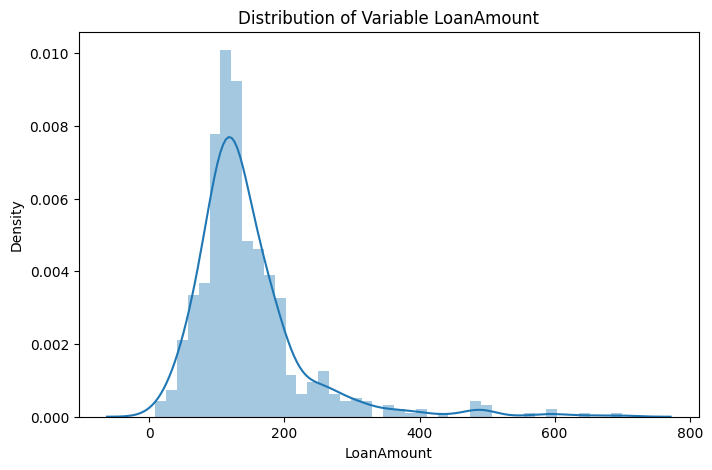

In [36]:
fig = plt.figure(figsize=(8, 5))

sns.distplot(df["LoanAmount"])
plt.title("Distribution of Variable LoanAmount") # seaborn.distplot ფუნქციის გამოყენებით LoanAmount სვეტისთვის გრაფიკის აგება

Text(0.5, 1.0, 'Distribution of Variable LoanAmount')

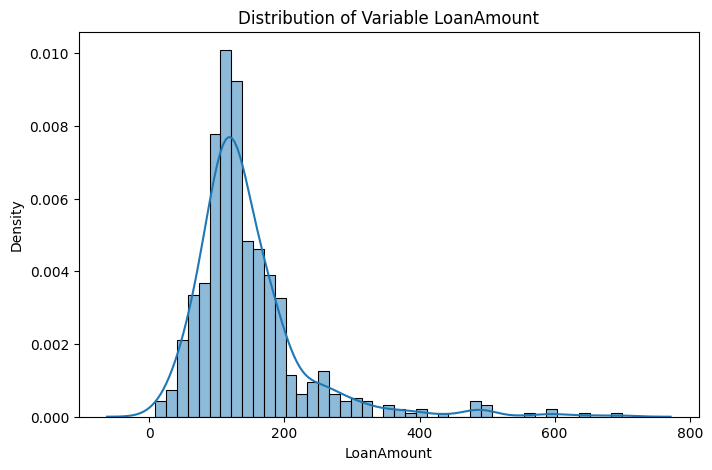

In [37]:
fig = plt.figure(figsize=(8, 5))

sns.histplot(df["LoanAmount"], kde=True, stat="density", kde_kws=dict(cut=3)) 
plt.title("Distribution of Variable LoanAmount") # seaborn.histplot ფუნქციის გამოყენებით LoanAmount სვეტისთვის გრაფიკის აგება

In [38]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

(array([151., 297.,  85.,  36.,  12.,  11.,   8.,   6.,   1.,   0.,   0.,
          0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  2845.,  5540.,  8235., 10930., 13625., 16320., 19015.,
        21710., 24405., 27100., 29795., 32490., 35185., 37880., 40575.,
        43270., 45965., 48660., 51355., 54050., 56745., 59440., 62135.,
        64830., 67525., 70220., 72915., 75610., 78305., 81000.]),
 <BarContainer object of 30 artists>)

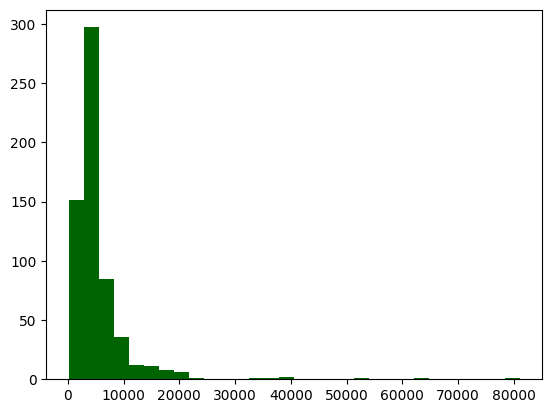

In [39]:
plt.hist(df["ApplicantIncome"], bins=30, color='darkgreen') # plt.hist ფუნქციის გამოყენებით ApplicantIncome სვეტისთვის მუქი მწვანე ჰისტოგრამის აგრება
# 30 bins-ით

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    object 
 2   Married           611 non-null    object 
 3   Dependents        599 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     582 non-null    object 
 6   ApplicantIncome   614 non-null    int64  
 7   LoanAmount        592 non-null    float64
 8   Loan_Amount_Term  600 non-null    float64
 9   Credit_History    564 non-null    float64
 10  Property_Area     614 non-null    object 
 11  Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [41]:
n1 = df[df['ApplicantIncome']<2000]['ApplicantIncome'].count()
total_ApplicantIncome = df['ApplicantIncome'].count()
n1/total_ApplicantIncome

0.06514657980456026

In [42]:
df[df['ApplicantIncome']>2000]["ApplicantIncome"].count()

573

In [43]:
n1  

40

In [174]:
df.isnull().any()

Loan_ID             False
Gender               True
Married              True
Dependents           True
Education           False
Self_Employed        True
ApplicantIncome     False
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area       False
Loan_Status         False
dtype: bool

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [24]:
from scipy.stats import norm

In [27]:
ApplicantIncome_x = 2000
ApplicantIncome_mean = df["ApplicantIncome"].mean()
ApplicantIncome_std = df["ApplicantIncome"].std()
ApplicantIncome_probability = norm.cdf(ApplicantIncome_x, ApplicantIncome_mean, ApplicantIncome_std)
ApplicantIncome_probability*100   # რაც უფრო დიდი რაოდენობის მონაცემები გვექნება რეალურთან მით მეტად დაახლოვდება

28.872328177095586

In [28]:
df["ApplicantIncome"].mode()

0    2500
Name: ApplicantIncome, dtype: int64

In [181]:
count_less_than_2000 = len(df[df["ApplicantIncome"] < 2000])
total_persons = len(df)
percentage_less_than_2000 = (count_less_than_2000 / total_persons) * 100
percentage_less_than_2000

6.514657980456026

## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ. 

In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.0,1.0


<Axes: xlabel='LoanAmount'>

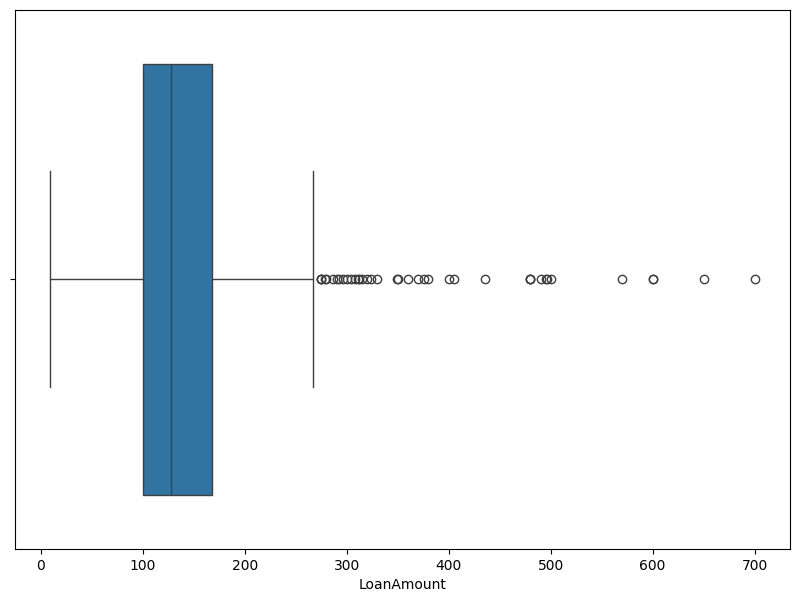

In [45]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(x = df["LoanAmount"]) 

<Axes: xlabel='ApplicantIncome'>

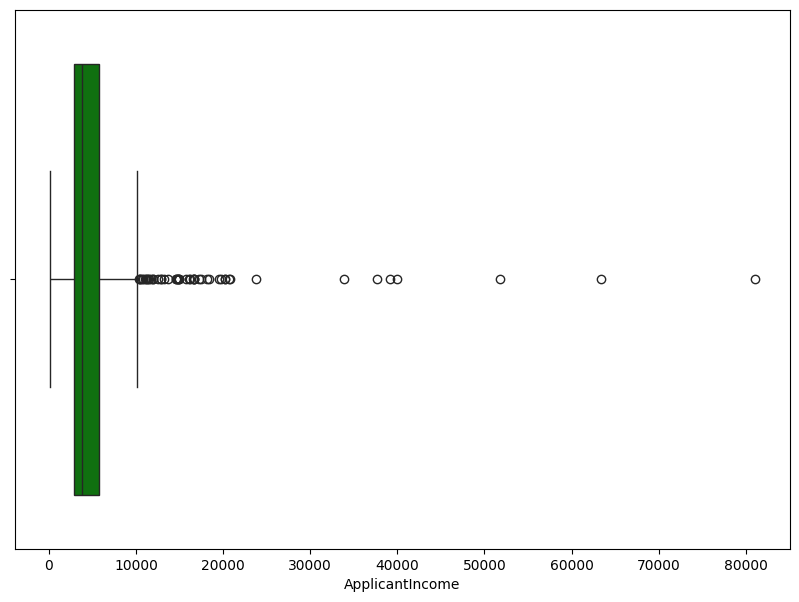

In [48]:
fig = plt.figure(figsize=(10, 7))
sns.boxplot(x = df["ApplicantIncome"], color='Green')

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია. 

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია. 

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [119]:
from scipy.stats import ttest_1samp,ttest_ind

In [120]:
# ჰიპოთეზე: შემოსავლების საშუალო მეტია 5000-ზე. 
# ნულოვანი : შემოსავლების საშუალო ნაკლებია ან ტოლია 5000-ზე 
# ალტერნატიული : შემოსავლების საშუალო  მეტია 5000-ზე

incomes = np.array(df["ApplicantIncome"])

In [121]:
type(incomes)

numpy.ndarray

In [122]:
t_statistic, p_value = ttest_1samp(incomes, 5000)

In [123]:
print(t_statistic, p_value)

1.6364804093914873 0.10225234862970933


In [124]:
# p_value = 0.10225234862970933 რაც მეტია 0.05 ამოიტომ ნულოვან ჰიპოთეზას ვერ გავქუქმებთ და შესაბამისად ალტერნატიულს ვერ მივიღებთ.
# შესამამისათ არ გვაქვს საკმარისი მტკიცემულება რომ დავასკვნათ, რომ შემოსავალთა საშუალო 5000-ზე მეტია

In [125]:
# t-test ანალიზი (Two sample t-test) 

In [126]:
loan_list_1 = np.array(df["LoanAmount"][1:16])

In [127]:
loan_list_1

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125.])

In [128]:
len(loan_list_1)

15

In [129]:
loan_list_2 = np.array(df["LoanAmount"].dropna()[100:115])

In [130]:
loan_list_2

array([120., 216.,  94., 136., 139., 152., 118., 185., 154.,  85., 175.,
       259., 180.,  44., 137.])

In [131]:
len(loan_list_2)

15

In [132]:
# ჰიპოთეზე: შერჩეულ ორი n=15 კაციან ჯგუფში LoanAmount-ების საშუალოები ტოლი იქნება
# ნულოვანი: ორი n=15 კაციან ჯგუფში LoanAmount-ების საშუალოები ტოლი არ იქნება
# ალტერნატიული: ორი n=15 კაციან ჯგუფში LoanAmount-ების საშუალოები ტოლი იქნება

In [133]:
ttest_ind(a=loan_list_1, b=loan_list_2, equal_var=True)

TtestResult(statistic=-0.1766845584717648, pvalue=0.8610279785419275, df=28.0)

In [ ]:
#  pvalue=0.8610279785419275 რაც მეტია 0.05 და შესამაბისად ვერ ვუარყობთ ნულოვან ჰიპოთეზას. ეს კი იმას ნიშნავს რომ ვერ მივიღებთ ალტერნატიულს.
# გამომდინარეობს, რომ არ გვაქვს საკმარისი მტკიცებულება დავასკვნათ, რომ ორ შერჩეულ 15კაციან ჯგუფებში ვალის რაოდენობებბის საშიალოები ტოლები იქნება